In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

melbourne_file_path = 'housing.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns


for col in melbourne_data.columns:
    for index, value in melbourne_data[col].items():
        if value == 'yes':
            melbourne_data.at[index, col] = 1
        elif value == 'no':
            melbourne_data.at[index, col] = 0
        elif value == 'furnished':
            melbourne_data.at[index, col] = 2
        elif value == 'semi-furnished':
            melbourne_data.at[index, col] = 1
        elif value == 'unfurnished':
            melbourne_data.at[index, col] = 0

# Print the modified DataFrame
#print(melbourne_data)


melbourne_data = melbourne_data.dropna(axis=0)


#melbourne_data.describe

Y = melbourne_data.price

melbourne_features = [
    'area',
    'bedrooms',
    'bathrooms',
    'stories',
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'parking',
    'prefarea',
    'furnishingstatus']

# melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']



# melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = melbourne_data[melbourne_features]

#X.describe
#X.head

melbourne_model = DecisionTreeRegressor(random_state=1)

# melbourne_model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

train_data = X_train.join(y_train)

train_data


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
272,4075,3,1,1,1,1,1,0,0,2,0,1,4340000
40,6550,3,1,2,1,0,1,0,1,0,1,2,7875000
326,4100,4,1,1,0,0,1,0,0,0,0,0,3990000
441,4370,3,1,2,1,0,0,0,0,0,0,0,3220000
511,3180,3,1,1,0,0,0,0,0,0,0,0,2520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,11460,3,1,3,1,0,0,0,0,2,1,1,5873000
144,4700,4,1,2,1,1,1,0,1,1,0,2,5600000
72,5020,3,1,4,1,0,0,0,1,0,1,0,6720000
235,5680,3,1,2,1,1,0,0,1,1,0,1,4620000


In [ ]:
#X = melbourne_data[melbourne_features]

array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'stories'}>],
       [<AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

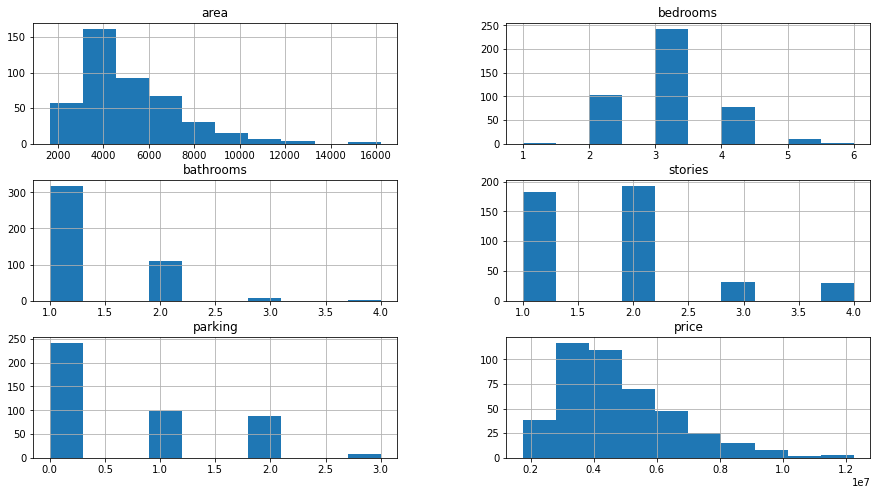

In [128]:
train_data.hist(figsize = (15,8))


<AxesSubplot:>

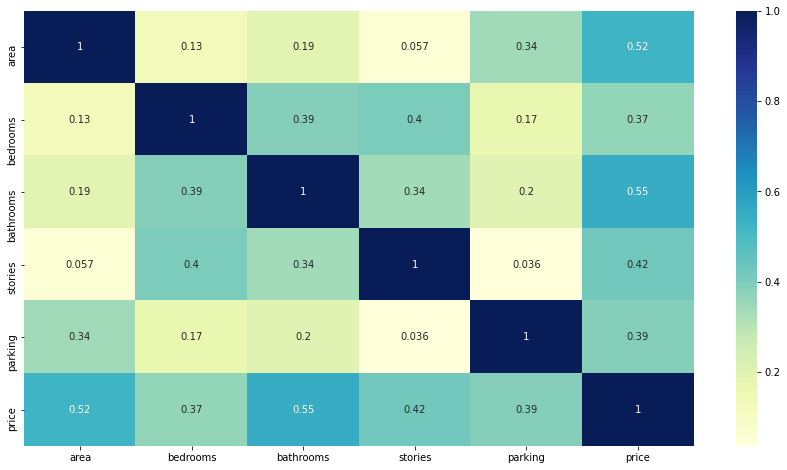

In [127]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [104]:
# train_data['area']=np.log(train_data['area']+1)
# train_data['bedrooms']=np.log(train_data['bedrooms']+1)
# train_data['bathrooms']=np.log(train_data['bathrooms']+1)
# train_data['stories']=np.log(train_data['stories']+1)
# train_data['price']=np.log(train_data['price']+1)
# train_data['bedrooms']=np.log(train_data['parking']+1)

<AxesSubplot:xlabel='area', ylabel='price'>

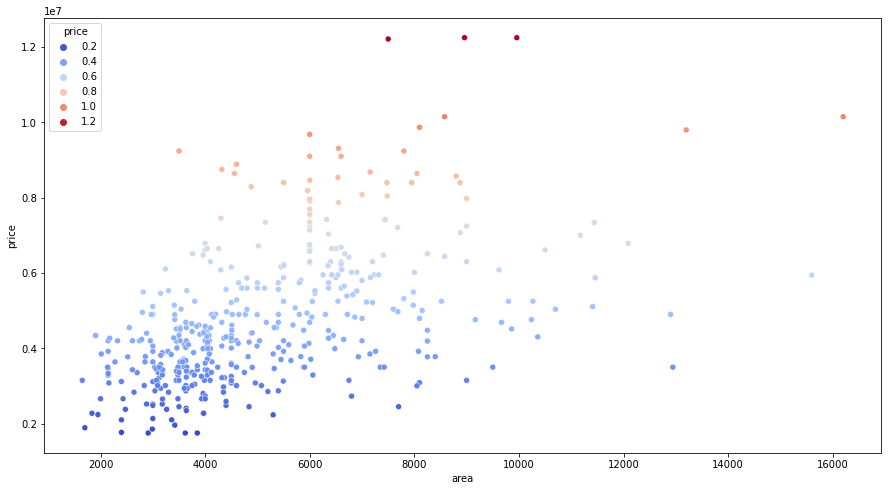

In [126]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="area", y="price", data=train_data, hue="price", palette="coolwarm")

In [181]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['price'], axis=1), train_data['price']

reg = LinearRegression()

reg.fit(X_train, y_train)
# reg.score(X_train, y_train)
# reg.predict(X_test)

melbourne_features = [
    'area',
    'bedrooms',
    'bathrooms',
    'stories',
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'parking',
    'prefarea',
    'furnishingstatus']


sample = pd.read_csv('housing.csv', 
                    header=0, 
                    usecols=["area","bedrooms",	"bathrooms",	"stories",	"mainroad",	"guestroom",	"basement",	"hotwaterheating"	,"airconditioning","parking","prefarea","furnishingstatus"],
                    nrows=1)
print(sample[melbourne_features])
# reg.predict(sample[melbourne_features])



   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420         4          2        3      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  


In [ ]:
train_data = X_train.join(y_train)

train_data['area']=np.log(train_data['area']+1)
train_data['bedrooms']=np.log(train_data['bedrooms']+1)
train_data['bathrooms']=np.log(train_data['bathrooms']+1)
train_data['stories']=np.log(train_data['stories']+1)
train_data['price']=np.log(train_data['price']+1)
# train_data['bedrooms']=np.log(train_data['parking']+1)

In [108]:
# melbourne_model.fit(X, y)
# melbourne_model.score(X,y)

0.9989689112454311

In [149]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['price'], axis=1), train_data['price']

reg = LinearRegression()

reg.fit(X_train, y_train)
reg.predict(X_train)
print("Hello")

# reg.predict(sampleData)

Hello


In [150]:
# from sklearn.linear_model import LinearRegression

# X_train, y_train = train_data.drop(['price'], axis=1), train_data['price']

# reg = LinearRegression()

# reg.fit(X_train, y_train)
# coeff = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient']) 

In [147]:
# predictions = reg.predict(X_test)
# plt.scatter(y_test, predictions)